<a href="https://colab.research.google.com/github/ssrbazpur/BigQuery/blob/master/Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3><center><b>ENVISIONING YELLOW TAXI DEMAND IN NYC CITY</b></center> </h3>
<h4><center><b>Prepared By: Simranjeet Randhawa</b></center> </h4>
<h4><center><b>Student ID: 200412297</b></center> </h4>






<h3><b>1 Introduction</b></h3>
<p align="justify">
New York City is known as the home of the great yellow taxis. Yellow taxi cabs are the main vehicles that reserve the privilege to street-hailing and prearranged passengers anyplace in NYC. The vehicles that come under TLC( Taxi and Limousine Commission) includes yellow taxis, FHV’s(For-hire vehicles), Green cabs, Paratransit Vehicle and Commuter Vans. Yellow cab is the most iconic as they are allowed to pick the passenger waving for a ride anywhere in the city. Whereas FHV provides only pre-arranged services and Green Taxi permits street hailing but is restricted to some zones only in NYC city. By law there are 13587
taxis in NYC and each of them must have a medallion fixed to it. Taxi services, for example, Uber have
upset the NYC taxi business. Uber has gotten gigantically famous in New York, and its excursions outpaced
yellow taxicabs just because of a year ago.
The most concerning issue for any taxi company is to predict their tax’s demand. Riders may need to stand
by longer when request surpasses supply. There are currently there are around 13,500 yellow taxis in NYC.
They may not satisfy all the interest yet it is conceivable to improve their usage. They may not fulfil all the
demand but it is possible to improve their utilization. This past March, yellow cabs earned, on average, roughly 9,100 dollars ― a revenue drop of 36 per cent over six years. The fares per medallion dropped from 14,432 dollars in March 2013 to $9,127 in March 2019 due to loss in the revenue generated by the yellow cabs
taxis.</p>

<h3> <b>2- Data Science Lifecycle </b> </h3>
Data Science lifecycle consist of the following steps:
<!--
<ul>
<li>
Phase 1 — Discovery </li>
<li>
Phase 2 — Data preparation </li>
<li>
Phase 3 — Model planning </li>
<li>
Phase 4 — Model building </li>
<li>
Phase 5 — Operationalize</li>
<li>
Phase 6 — Communicate results</li>
</ol>
-->

<br>
<center>
<img heigh=400 width=400 src="https://www.edureka.co/blog/wp-content/uploads/2017/01/Lifecycle-of-Data-Science.png"/></center>
<p>
<center> Data Science Lifecycle [1]</center>

<h3> <b>3. Business Problem Definition: </b></h3>
<p align="justify">
New York City is a very busy city and requires taxis quite often. My aim is to predict the taxis pickups
required in New York City depending on the weather conditions. The prediction can help the TLC agency
to know the taxi demand in New York depending on the weather conditions and the NYC taxi company
can prepare well ahead of time to make use of this prediction to ensure that there is the presence of certain
taxis that are required in that weather. If the weather is extreme there is no point dispatching a large number
of taxis as it will only cause loss to the company revenue. And if the weather is pleasant there is a need for
a certain number of taxis such that the demand of the customer is met. If the demand is not met the company
is certainly to lag behind Uber and other taxi services. Till 2014 the trips of yellow taxis were growing but in 2015 with the introduction of uber. the yellow taxi
daily dispatched trips began to decrease gradually. A unique quality about Yellow cabs is that they can pick
up passengers from the streets without any pre-arranged booking required. Whereas in the case of Uber,
passengers mainly use the app to arrange for the taxi. So I found an opportunity for yellow cabs to get back
on track by targeting the streets where the pickups demand are high. If the passenger waits too much they
basically switch to apps to look for a taxi but if the passengers can see a yellow cab right in front of them,
they will surely choose the yellow cab instead of waiting for Uber. Hence this data science projects focus
to help the NYC TLC yellow taxis to get back on track and increase the number of pickups around the NYC
city. Also, the yellow cab taxi drivers can make use of the website to see the forecasted demand of different
zones in NYC city
</p>


<h3><b> 4. Data Discovery Phase </b></h3>

<h4><b>4.1 Data Gathering</b></h4>
<p align="justify">Data Gathering is the first step of the machine learning life cycle. The goal of this step is to identify and obtain all data-related problems.
In this step, we need to identify the different data sources, as data can be collected from various sources such as files, database, internet, or mobile devices. It is one of the most important steps of the life cycle. The quantity and quality of the collected data will determine the efficiency of the output. The more will be the data, the more accurate will be the prediction.
This step includes the below tasks:
<ul>
<li>Identify various data sources</li>
<li>Collect data</li>
<li>Integrate the data obtained from different sources</li>
</ul> By performing the above task, we get a coherent set of data, also called as a dataset. It will be used in further steps.</p>

In [0]:
#Libraries Used
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools

In [0]:
#To switch off the scroll view in the output
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [0]:
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [0]:
#Need for Ploty Graphs
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

<h4><b>4.2 Identifying Data Sources</b></h4>
<p align="justify">
<ul>

<li><b>Weather Data:</b><p align="justify"> This public dataset was created by the National Oceanic and Atmospheric Administration (NOAA) and includes global data obtained from the USAF Climatology Center. This dataset covers GSOD data between 1929 and present (updated daily), collected from over 9000 stations.
</p>
</li>

<li><b>Zone Data:</b> <p align="justify">It consists of an Shape file that is converted into a CSV file using an online converter and then processed using pandas. It consist of 263 zones in NYC city where the yellow taxi operates.</p></li>
</p>
<li><b>Yellow Taxi Trip Data:</b><p align="justify"> The NYC yellow taxi data set is avaiable openly on NYC government site.The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs.</p></li>
</ul>

    

<h4><b>4.3 Data Collection using Pyspark</b></h4>
<p align="justify">
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. It is avaiable as s3 amazon data bucket which was initially difficult to read using a pandas dataframe. Hence the requirement of Pyspark was felt that eased the task of collecting the data from s3 bucket and use the concept of RDD to help process large set of data.
</p>
    

<p> <b> <u> 2018 Taxi Data Collection </u></b> </p>

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install -q findspark

In [0]:
# 2. Setup Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()

In [0]:
from pyspark import SparkContext
from pyspark.sql import HiveContext, SQLContext, Row
from pyspark.sql.types import *
from datetime import datetime
from pyspark.sql.functions import col, date_sub, log, mean, to_date, udf, unix_timestamp
from pyspark.sql.window import Window
from pyspark.sql import DataFrame

In [0]:
sc =SparkContext()
sc.setLogLevel("DEBUG")
sqlContext = SQLContext(sc)

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [0]:
from pyspark import SparkFiles
url1 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv"
url2 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-02.csv"
url3 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-03.csv"
url4 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-04.csv"
url5 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-05.csv"
url6 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-06.csv"

url7 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-07.csv"
url8 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-08.csv"
url9 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-09.csv"
url10 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-10.csv"
url11 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-11.csv"
url12 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-12.csv"

spark.sparkContext.addFile(url1)
spark.sparkContext.addFile(url2)
spark.sparkContext.addFile(url3)
spark.sparkContext.addFile(url4)
spark.sparkContext.addFile(url5)
spark.sparkContext.addFile(url6)
spark.sparkContext.addFile(url7)
spark.sparkContext.addFile(url8)
spark.sparkContext.addFile(url9)
spark.sparkContext.addFile(url10)
spark.sparkContext.addFile(url11)
spark.sparkContext.addFile(url12)


In [0]:
df1 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2018-01.csv"), header=True, inferSchema= True)
df2 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2018-02.csv"), header=True, inferSchema= True)
df3 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2018-03.csv"), header=True, inferSchema= True)
df4 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2018-04.csv"), header=True, inferSchema= True)
df5 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2018-05.csv"), header=True, inferSchema= True)
df6 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2018-06.csv"), header=True, inferSchema= True)

df7 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2018-07.csv"), header=True, inferSchema= True)
df8 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2018-08.csv"), header=True, inferSchema= True)
df9 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2018-09.csv"), header=True, inferSchema= True)
df10 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2018-10.csv"), header=True, inferSchema= True)
df11 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2018-11.csv"), header=True, inferSchema= True)
df12 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2018-12.csv"), header=True, inferSchema= True)

In [0]:
df_lowerhalf = df1.union(df2)
df_lowerhalf = df_lowerhalf.union(df3)
df_lowerhalf = df_lowerhalf.union(df4)
df_lowerhalf = df_lowerhalf.union(df5)
df_lowerhalf = df_lowerhalf.union(df6)


In [0]:
df_upperhalf = d7.union(df8)
df_upperhalf = df_upperhalf.union(df9)
df_upperhalf = df_upperhalf.union(df10)
df_upperhalf = df_upperhalf.union(df11)
df_upperhalf = df_upperhalf.union(df12)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
print((df_concat.count(), len(df_concat.columns)))

In [0]:
#Creating Parquet files
df_upperhalf.write.parquet("/content/drive/My Drive/Data Science/2018secondhalf.parquet")
df_lowerhalf.write.parquet("/content/drive/My Drive/Data Science/2018firsthalf.parquet")

In [0]:
import pandas as pd
y2018_part1=pd.read_parquet('/content/drive/My Drive/Data Science/2018firsthalf.parquet')
y2018_part2=pd.read_parquet('/content/drive/My Drive/Data Science/2018secondhalf.parquet')

In [0]:
!pip install datalab

In [0]:
from datalab.context import Context

In [0]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/My Drive/Data Science/nyc-taxi-265120-baf9a3e4cf9b.json"
%reload_ext google.cloud.bigquery

In [0]:
#Storing to Google Cloud Platform
project_id = 'nyc-taxi-265120' #@param{type:"string"}
y2018_part1.to_gbq('NYC.2018firsthalf', 
                 Context.default().project_id,
                 chunksize=500000, 
                 if_exists='append',
                 verbose=False
                 )

In [0]:
#Storing to Google Cloud Platform
project_id = 'nyc-taxi-265120' #@param{type:"string"}
y2018_part2.to_gbq('NYC.2018SecondHalf', 
                 Context.default().project_id,
                 chunksize=500000, 
                 if_exists='append',
                 verbose=False
                 )

<b><u> 2019 Taxi Data Collection </u></b>

In [0]:
url1 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-01.csv"
url2 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-02.csv"
url3 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-03.csv"
url4 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-04.csv"
url5 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-05.csv"
url6 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-06.csv"

url7 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-07.csv"
url8 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-08.csv"
url9 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-09.csv"
url10 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-10.csv"
url11 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-11.csv"
url12 = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2019-12.csv"

spark.sparkContext.addFile(url1)
spark.sparkContext.addFile(url2)
spark.sparkContext.addFile(url3)
spark.sparkContext.addFile(url4)
spark.sparkContext.addFile(url5)
spark.sparkContext.addFile(url6)
spark.sparkContext.addFile(url7)
spark.sparkContext.addFile(url8)
spark.sparkContext.addFile(url9)
spark.sparkContext.addFile(url10)
spark.sparkContext.addFile(url11)
spark.sparkContext.addFile(url12)


In [0]:
df21 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2019-01.csv"), header=True, inferSchema= True)
df22 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2019-02.csv"), header=True, inferSchema= True)
df23 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2019-03.csv"), header=True, inferSchema= True)
df24 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2019-04.csv"), header=True, inferSchema= True)
df25 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2019-05.csv"), header=True, inferSchema= True)
df26 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2019-06.csv"), header=True, inferSchema= True)

df27 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2019-07.csv"), header=True, inferSchema= True)
df28 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2019-08.csv"), header=True, inferSchema= True)
df29 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2019-09.csv"), header=True, inferSchema= True)
df210 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2019-10.csv"), header=True, inferSchema= True)
df211 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2019-11.csv"), header=True, inferSchema= True)
df212 = spark.read.csv("file://"+SparkFiles.get("yellow_tripdata_2019-12.csv"), header=True, inferSchema= True)

In [0]:
df_lowerhalf_2020 = df21.union(df22)
df_lowerhalf_2020 = df_lowerhalf_2020.union(df23)
df_lowerhalf_2020 = df_lowerhalf_2020.union(df24)
df_lowerhalf_2020 = df_lowerhalf_2020.union(df25)
df_lowerhalf_2020 = df_lowerhalf_2020.union(df26)

In [0]:
df_upperhalf_2020 = df27.union(df28)
df_upperhalf_2020 = df_upperhalf_2020.union(df29)
df_upperhalf_2020 = df_upperhalf_2020.union(df210)
df_upperhalf_2020 = df_upperhalf_2020.union(df211)
df_upperhalf_2020 = df_upperhalf_2020.union(df212)

In [0]:
df_upperhalf_2020.write.parquet("/content/drive/My Drive/Data Science/2019upper.parquet")
df_lowerhalf_2020.write.parquet("/content/drive/My Drive/Data Science/2019lower.parquet")

In [0]:
import pandas as pd
y2019upper=pd.read_parquet('/content/drive/My Drive/Data Science/2019upper.parquet')
y2019lower=pd.read_parquet('/content/drive/My Drive/Data Science/2019lower.parquet')

In [0]:
#Storing to Google Cloud Platform
project_id = 'nyc-taxi-265120' #@param{type:"string"}
y2019lower.to_gbq('NYC.2019firsthalf', 
                 Context.default().project_id,
                 chunksize=500000, 
                 if_exists='append',
                 verbose=False
                 )

In [0]:
#Storing to Google Cloud Platform
project_id = 'nyc-taxi-265120' #@param{type:"string"}
y2019upper.to_gbq('NYC.2019secondhalf', 
                 Context.default().project_id,
                 chunksize=500000, 
                 if_exists='append',
                 verbose=False
                 )

<b><u> Weather Data </u></b>

In [0]:
project_id = 'nyc-taxi-265120' 

In [0]:
project_id = 'nyc-taxi-265120' 
from google.cloud import bigquery
client = bigquery.Client(project = project_id)

In [0]:
from google.cloud import bigquery

client = bigquery.Client(project=project_id)

sample_count = 2000
row_count = client.query('''
  SELECT 
    COUNT(*) as total
  FROM `bigquery-public-data.samples.gsod`''').to_dataframe().total[0]

df = client.query('''
  SELECT
    *
  FROM
    `bigquery-public-data.samples.gsod`
  WHERE RAND() < %d/%d
''' % (sample_count, row_count)).to_dataframe()

print('Full dataset has %d rows' % row_count)

Full dataset has 114420316 rows


In [0]:
df.head()

station_number  wban_number  year  month  ...   snow   hail  thunder  tornado
0          153490        99999  1985      9  ...  False  False    False    False
1          722025        12849  1994      8  ...  False  False    False    False
2          715520        99999  1999      9  ...  False  False    False    False
3          333012        99999  2004      7  ...  False  False    False    False
4          726502        54832  2009      5  ...  False  False    False    False

[5 rows x 31 columns]

<b><u> Taxi Zone Data </u></b>


In [0]:
SELECT COUNT(*) FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom` LIMIT 1000

In [0]:
df = client.query('''SELECT * FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom` ''' ).to_dataframe()

In [0]:
df.head()

zone_id  ...                                          zone_geom
0       1  ...  POLYGON((-74.1856319999999 40.6916479999999, -...
1       3  ...  POLYGON((-73.848596761 40.8716707849999, -73.8...
2      18  ...  POLYGON((-73.8844286139999 40.8668003789999, -...
3      20  ...  POLYGON((-73.8839239579998 40.8644177609999, -...
4      31  ...  POLYGON((-73.8710017319999 40.8572767429999, -...

[5 rows x 4 columns]

<h4><b>4.3 Intregrating all Data on One Platform</b></h4>
Google Cloud Platform : Big Query helps to explore such large datasets easily.

In [0]:
import pandas as pd
import numpy as np
import sys
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()

In [0]:
import plotly.express as px
configure_plotly_browser_state()

fig = px.bar( x=["Taxi2018","Taxi2019","Weather"], y=[53925735,44459136,114420316])
fig.update_layout(
    title="Data Shape for Taxi Trips Dataset",
    xaxis_title="x Axis Title",
    yaxis_title="# of Rows",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
pyo.iplot(fig)

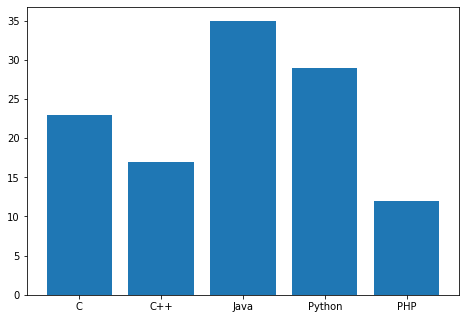

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.bar(langs,students)
plt.show()

In [0]:
import plotly.express as px
configure_plotly_browser_state()

fig = px.bar( x=["ZoneData"], y=[263])
fig.update_layout(
    title="Data Shape for Zone Data",
    xaxis_title="x Axis Title",
    yaxis_title="# of C",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
pyo.iplot(fig)

In [0]:
import plotly.express as px
configure_plotly_browser_state()

fig = px.bar( x=["Taxi2018","Taxi2019","Weather"], y=[17,17,30])
fig.update_layout(
    title="Shape of Dataset",
    xaxis_title="x Axis Title",
    yaxis_title="# of Columns",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
pyo.iplot(fig)

<h3><b> 5. Data Preparation </b></h3>
<p align="justify"> Data preparation is termed as the process of cleaning the data so that the data can be transformed in a form that can be processed and analysed. It is an important step prior to processing and often involves reformatting data, making corrections to data and the combining of data sets to enrich data.
</p>

<h4><b> 5.1 Data Cleaning </b></h4>

<b><u> 2018 Yellow Cab Data Cleaning (Big Query)</u></b>
<p align="justify"> 
<ol><li> Analyse if there is rows with total trip amount =0 ? </li>
<li>Is there rows with pick up time > drop off time.</li><li>  Analyse rows which have 0 passenger count.</li>
</ol>
</p>

In [0]:
query = """
SELECT count(*) FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where total_amount <= 0 LIMIT 10000
"""
df = client.query(query).to_dataframe()

In [0]:
query = """
SELECT * FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where tpep_pickup_datetime > tpep_dropoff_datetime LIMIT 10000
"""
df = client.query(query).to_dataframe()

In [0]:
query = """
SELECT count(*) FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where passenger_count = 0 LIMIT 10000
"""
df = client.query(query).to_dataframe()

In [0]:
query = """
SELECT count(*) FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where passenger_count = 0 and total_amount<=0 LIMIT 10000
"""
df = client.query(query).to_dataframe()

<b><u> 2019 Yellow Cab Data Cleaning (Big Query)</u></b>
<p align="justify"> 
<ol><li> Analyse if there is rows with total trip amount =0 ? </li>
<li>Is there rows with pick up time > drop off time.</li><li>  Analyse rows which have 0 passenger count.</li>
</ol>
</p>

In [0]:
query = """
SELECT count(*) FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where total_amount <= 0 LIMIT 10000
"""
df = client.query(query).to_dataframe()

In [0]:
query = """
SELECT * FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where tpep_pickup_datetime > tpep_dropoff_datetime LIMIT 10000
"""
df = client.query(query).to_dataframe()

In [0]:
query = """
SELECT count(*) FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where passenger_count = 0 LIMIT 10000
"""
df = client.query(query).to_dataframe()

In [0]:
query = """
SELECT count(*) FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where passenger_count = 0 and total_amount<=0 LIMIT 10000
"""
df = client.query(query).to_dataframe()

<b><u> INNER JOIN (Eliminating out of Bounds Location if exists)</u></b>

Eliminaing out of Bound Location with the help of INNER JOIN.<br>
<ol><li>
Table A- Taxi Trips Data </li>
<li>
Table B- Zone Data</li>
</ol>

<img src="https://helloacm.com/wp-content/uploads/2019/04/sql-joins-venn-diagrams-inner-join.png"/>

The INNER JOIN keyword selects all rows from both tables as long as there is a match between the columns. It gives only the trips pickups in the NYC region.</p>

In [0]:
query = """
with td as(
WITH AB AS
(
SELECT  CAST(tpep_pickup_datetime AS DATETIME) AS PICKUP,* FROM `nyc-taxi-265120.NYC.2018_CreatedDataset` where total_amount>0
)  
SELECT  PICKUP,CAST(EXTRACT (YEAR from PICKUP) AS STRING) AS year,EXTRACT (DAYOFYEAR from PICKUP) AS daynumber,EXTRACT (HOUR from PICKUP) AS hour, cast(PULocationID as STRING) as LOCATION,COUNT(*) AS numtrips FROM AB group by PICKUP,year,daynumber,hour,LOCATION),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)


SELECT 
cast(DATE(td.PICKUP) as STRING) AS A1,
points.zone_id,

CAST(TIME(DATETIME_TRUNC(td.PICKUP, HOUR)) as string) rounded_to_hour,
SUM(td.numtrips) as label,
FROM  td INNER JOIN points ON points.zone_id=td.LOCATION AND
eXTRACT (YEAR from PICKUP) =2018 AND td.daynumber<150
group by zone_id,A1,rounded_to_hour

"""
df1 = client.query(query).to_dataframe()

<h4> <b>5.2 Data Wrangling </b></h4>
<p align="justify"> Data wrangling which is also referred as data munging.The main moto transform data into a format that is more appropriate and considered more valuable.</p>
<b><u> 2018 Data Wrangling</u></b>

In [0]:
query = """
with td as(
WITH AB AS
(
SELECT  CAST(tpep_pickup_datetime AS DATETIME) AS PICKUP,* FROM `nyc-taxi-265120.NYC.2018firsthalf`
)  
SELECT  PICKUP,CAST(EXTRACT (YEAR from PICKUP) AS STRING) AS year,EXTRACT (DAYOFYEAR from PICKUP) AS daynumber,EXTRACT (HOUR from PICKUP) AS hour, cast(PULocationID as STRING) as LOCATION,COUNT(*) AS numtrips FROM AB group by PICKUP,year,daynumber,hour,LOCATION),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)
SELECT 
cast(DATE(td.PICKUP) as STRING) AS A1,
points.zone_id,
CAST(TIME(DATETIME_TRUNC(td.PICKUP, HOUR)) as string) rounded_to_hour,
SUM(td.numtrips) as label,
FROM  td INNER JOIN points ON points.zone_id=td.LOCATION AND
eXTRACT (YEAR from PICKUP) =2018 
group by zone_id,A1,rounded_to_hour
"""
df1 = client.query(query).to_dataframe()

In [0]:
import pandas as pd
df1["time"]=pd.to_datetime(df1['A1'] + ' ' + df1['rounded_to_hour'])
a=df1.pivot_table("label", "time", "zone_id")
b=df1.pivot_table("label", "time", "zone_id").unstack().reset_index()
b.rename( columns={0:'pickups'}, inplace=True )
b1=b.fillna(0)

In [0]:
b1.head()

zone_id                time  pickups
0       1 2018-01-01 00:00:00      0.0
1       1 2018-01-01 01:00:00      0.0
2       1 2018-01-01 02:00:00      0.0
3       1 2018-01-01 03:00:00      1.0
4       1 2018-01-01 04:00:00      3.0

In [0]:
from datalab.context import Context
#Dont run this

b1.to_gbq('hello.2018DataFirsthalf', 
                 Context.default().project_id,
                 chunksize=500000, 
                 if_exists='append',
                 verbose=False
                 )

/usr/local/lib/python3.6/dist-packages/pandas_gbq/gbq.py:1127: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  stacklevel=1,
3it [00:56, 15.09s/it]


In [0]:
query = """
with td as(
WITH AB AS
(
SELECT  CAST(tpep_pickup_datetime AS DATETIME) AS PICKUP,* FROM `nyc-taxi-265120.NYC.2018SecondHalf`
)  
SELECT  PICKUP,CAST(EXTRACT (YEAR from PICKUP) AS STRING) AS year,EXTRACT (DAYOFYEAR from PICKUP) AS daynumber,EXTRACT (HOUR from PICKUP) AS hour, cast(PULocationID as STRING) as LOCATION,COUNT(*) AS numtrips FROM AB group by PICKUP,year,daynumber,hour,LOCATION),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)
SELECT 
cast(DATE(td.PICKUP) as STRING) AS A1,
points.zone_id,
CAST(TIME(DATETIME_TRUNC(td.PICKUP, HOUR)) as string) rounded_to_hour,
SUM(td.numtrips) as label,
FROM  td INNER JOIN points ON points.zone_id=td.LOCATION AND
eXTRACT (YEAR from PICKUP) =2018 
group by zone_id,A1,rounded_to_hour
"""
df1 = client.query(query).to_dataframe()

In [0]:
import pandas as pd
df1["time"]=pd.to_datetime(df1['A1'] + ' ' + df1['rounded_to_hour'])
a=df1.pivot_table("label", "time", "zone_id")
b=df1.pivot_table("label", "time", "zone_id").unstack().reset_index()
b.rename( columns={0:'pickups'}, inplace=True )
b1=b.fillna(0)

In [0]:
from datalab.context import Context
#Dont run this

b1.to_gbq('hello.2018DataSecondhalf', 
                 Context.default().project_id,
                 chunksize=500000, 
                 if_exists='append',
                 verbose=False
                 )

/usr/local/lib/python3.6/dist-packages/pandas_gbq/gbq.py:1127: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  stacklevel=1,
3it [00:43, 11.34s/it]


<b><u> 2019 Data Wrangling</u></b>

In [0]:
query = """
with td as(
WITH AB AS
(
SELECT  CAST(tpep_pickup_datetime AS DATETIME) AS PICKUP,* FROM `nyc-taxi-265120.NYC.2019firsthalf`
)  
SELECT  PICKUP,CAST(EXTRACT (YEAR from PICKUP) AS STRING) AS year,EXTRACT (DAYOFYEAR from PICKUP) AS daynumber,EXTRACT (HOUR from PICKUP) AS hour, cast(PULocationID as STRING) as LOCATION,COUNT(*) AS numtrips FROM AB group by PICKUP,year,daynumber,hour,LOCATION),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)
SELECT 
cast(DATE(td.PICKUP) as STRING) AS A1,
points.zone_id,
CAST(TIME(DATETIME_TRUNC(td.PICKUP, HOUR)) as string) rounded_to_hour,
SUM(td.numtrips) as label,
FROM  td INNER JOIN points ON points.zone_id=td.LOCATION AND
eXTRACT (YEAR from PICKUP) =2019 
group by zone_id,A1,rounded_to_hour
"""
df1 = client.query(query).to_dataframe()

In [0]:
import pandas as pd
df1["time"]=pd.to_datetime(df1['A1'] + ' ' + df1['rounded_to_hour'])
a=df1.pivot_table("label", "time", "zone_id")
b=df1.pivot_table("label", "time", "zone_id").unstack().reset_index()
b.rename( columns={0:'pickups'}, inplace=True )
b1=b.fillna(0)

In [0]:
from datalab.context import Context
#Dont run this

b1.to_gbq('hello.2019DataFirsthalf', 
                 Context.default().project_id,
                 chunksize=500000, 
                 if_exists='append',
                 verbose=False
                 )

/usr/local/lib/python3.6/dist-packages/pandas_gbq/gbq.py:1127: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  stacklevel=1,
3it [00:28,  8.09s/it]


In [0]:
query = """
with td as(
WITH AB AS
(
SELECT  CAST(tpep_pickup_datetime AS DATETIME) AS PICKUP,* FROM `nyc-taxi-265120.NYC.2019secondhalf`
)  
SELECT  PICKUP,CAST(EXTRACT (YEAR from PICKUP) AS STRING) AS year,EXTRACT (DAYOFYEAR from PICKUP) AS daynumber,EXTRACT (HOUR from PICKUP) AS hour, cast(PULocationID as STRING) as LOCATION,COUNT(*) AS numtrips FROM AB group by PICKUP,year,daynumber,hour,LOCATION),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)
SELECT 
cast(DATE(td.PICKUP) as STRING) AS A1,
points.zone_id,
CAST(TIME(DATETIME_TRUNC(td.PICKUP, HOUR)) as string) rounded_to_hour,
SUM(td.numtrips) as label,
FROM  td INNER JOIN points ON points.zone_id=td.LOCATION AND
eXTRACT (YEAR from PICKUP) =2019 
group by zone_id,A1,rounded_to_hour
"""
df1 = client.query(query).to_dataframe()

In [0]:
df1.head()

A1 zone_id rounded_to_hour  label
0  2019-07-16     233        00:00:00     34
1  2019-10-31      87        00:00:00     64
2  2019-07-16     141        00:00:00     48
3  2019-07-17      90        00:00:00     94
4  2019-07-17     232        00:00:00     14

In [0]:
import pandas as pd
df1["time"]=pd.to_datetime(df1['A1'] + ' ' + df1['rounded_to_hour'])
a=df1.pivot_table("label", "time", "zone_id")
b=df1.pivot_table("label", "time", "zone_id").unstack().reset_index()
b.rename( columns={0:'pickups'}, inplace=True )
b1=b.fillna(0)

In [0]:
from datalab.context import Context
#Dont run this

b1.to_gbq('hello.2019DataSecondhalf', 
                 Context.default().project_id,
                 chunksize=500000, 
                 if_exists='append',
                 verbose=False
                 )

/usr/local/lib/python3.6/dist-packages/pandas_gbq/gbq.py:1127: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  stacklevel=1,
3it [00:37, 10.32s/it]


<b> <u> Taxi Zone Data Visulizations </u></b>

In [0]:
query = """
WITH ZONE AS (
SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`
)
SELECT * ,ST_X(p) as longitude,
  ST_Y(p) as latitude FROM ZONE

"""
df = client.query(query).to_dataframe()

In [0]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from datetime import datetime
import time
import seaborn as sns
import os
import math
import warnings

In [0]:
#detecting the pickups latitude and longitudes which are outside NYC.
outside_NYC = df[(df.latitude != 0) | (df.longitude != 0) ]
#latitude at equator is 0. Above equator latitude increases and becomes 90 at north pole. Below equator latitude decreases and
#is negative and becomes -90 at south pole.
#Longitude is 0 at United Kingdom(UK). To the right of UK, longitude increases positively and to the left of UK longitude decrease
#and is negative.
m = folium.Map(location = [40.5774, -73.7004], tiles = "Stamen Toner")
outside_pickups = outside_NYC.head(25000)
for i,j in outside_pickups.iterrows():
    if j["latitude"] != 0:
        folium.Marker(location=[j["latitude"], j["longitude"]],popup=j["zone_name"]).add_to(m)
m

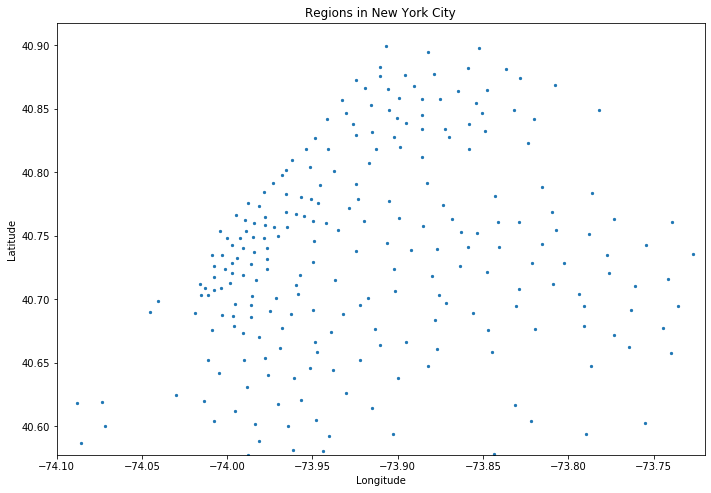

In [0]:
NYC_latitude_range = (40.5774, 40.9176)
NYC_Longitude_range = (-74.15, -73.7004)
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
ax.scatter(x = df.longitude.values[:70000], y = df.latitude.values[:70000], cmap = "Paired", s = 5)
ax.set_xlim(-74.10, -73.72)
ax.set_ylim(40.5774, 40.9176)
ax.set_title("Regions in New York City")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

<h3> <b> 6. Model Planning with Data Exploration </b> </h3>
<p align="justify">
Data Exploration is the phase where one tries to understand the data in hand and how the different variables interact between each other. In Machine Learning, Data Exploration always precede the creation of the predictive model as it allows us to come up with ideas in order to increase the models’ performances.
</p>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/My Drive/Data Science/nyc-taxi-265120-baf9a3e4cf9b.json"
%reload_ext google.cloud.bigquery

In [0]:
project_id = 'nyc-taxi-265120' 
from google.cloud import bigquery
client = bigquery.Client(project = project_id)

In [0]:
query = """
SELECT  * FROM `hello.2019DataFirsthalf`
"""
first_2019 = client.query(query).to_dataframe()

In [0]:
query = """
SELECT  * FROM `hello.2019DataSecondhalf`
"""
second_2019 = client.query(query).to_dataframe()

In [0]:

query = """
SELECT  * FROM `hello.2018DataSecondhalf`
"""
second_2018 = client.query(query).to_dataframe()

In [0]:
query = """
SELECT  * FROM `hello.2018DataFirsthalf`
"""
first_2018 = client.query(query).to_dataframe()

In [0]:
import pandas as pd
concat=pd.concat([first_2018,second_2018,second_2019,first_2019],ignore_index=True)

In [0]:
!pip install datalab

In [0]:
from datalab.context import Context
#Dont run this

concat.to_gbq('hello.CombinedData', 
                 Context.default().project_id,
                 chunksize=500000, 
                 if_exists='append',
                 verbose=False
                 )

/usr/local/lib/python3.6/dist-packages/pandas_gbq/gbq.py:1127: FutureWarning: verbose is deprecated and will be removed in a future version. Set logging level in order to vary verbosity
  stacklevel=1,
10it [02:25, 14.71s/it]


<h3> <b> 6. Model Planning - Feature Engineering </b> </h3>
<p align="justify">
In model planning,the methods, techniques, and workflow is being determined. In this phase the data is explored to learn about the relationships between variables and subsequently selects key variables and the most suitable models.
</p>

In [0]:
query = """
SELECT  * FROM `hello.CombinedData`
"""
data = client.query(query).to_dataframe()

<b><u> 2019 Data </u><b>

In [0]:
query = """
with wd as (
    SELECT 
        cast(year as STRING) as year,
        EXTRACT (DAYOFYEAR FROM CAST(CONCAT(year,'-',mo,'-',da) AS TIMESTAMP)) AS daynumber, 
        MIN(EXTRACT (DAYOFWEEK FROM CAST(CONCAT(year,'-',mo,'-',da) AS TIMESTAMP))) dayofweek,
        MIN(min) mintemp, MAX(max) maxtemp, MAX(IF(prcp=99.99,0,prcp)) rain
    FROM `bigquery-public-data.noaa_gsod.gsod2019`
    WHERE stn='725030'   --station id 725030=LaGuardia
    GROUP BY 1,2 
  
  -- TAXI DATA
  ),
TD AS(

SELECT  zone_id, time, pickups ,CAST(EXTRACT (YEAR from time) AS STRING) AS year,EXTRACT (DAYOFYEAR from time) AS daynumber,EXTRACT (HOUR from time) AS hour from `hello.CombinedData` ),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)
SELECT 
td.year,
points.zone_id,
td.time,
td.daynumber,
td.hour,
cast(wd.dayofweek as STRING) as dayofweek, 
    wd.mintemp, 
    wd.maxtemp,
    wd.rain,
 td.pickups,
    ST_ASTEXT(points.p) AS P,
  FROM wd, td INNER JOIN points ON points.zone_id=td.zone_id
  where wd.year = td.year AND
  wd.daynumber = td.daynumber
  group by year,zone_id,time,daynumber,hour,pickups,P,dayofweek, mintemp, maxtemp, rain
"""
df2 = client.query(query).to_dataframe()

In [0]:
zone=df2[['zone_id', 'pickups']] 

In [0]:
zonewise_2019 = zone.groupby(['zone_id']).sum()

In [0]:
zonewise_2019.reset_index(inplace = True)

In [0]:
import plotly.express as px
configure_plotly_browser_state()

fig = px.bar( x=zonewise_2019['zone_id'], y=zonewise_2019['pickups'])
fig.update_layout(
    title="Which Zone id has highest number of pickups in 2019?",
    xaxis_title="Zone ID",
    yaxis_title="Pickups",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
pyo.iplot(fig)

In [0]:
daynumber=df2[['daynumber', 'pickups']] 

In [0]:
daynumber_2019 = daynumber.groupby(['daynumber']).sum()
daynumber_2019.reset_index(inplace = True)

In [0]:
import plotly.express as px
configure_plotly_browser_state()

fig = px.bar( x=daynumber_2019['daynumber'], y=daynumber_2019['pickups'])
fig.update_layout(
    title="How pickups changes Day by Day in 2019?",
    xaxis_title="Day Number",
    yaxis_title="Pickups",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
pyo.iplot(fig)

In [0]:
ans_2019=df2[['time','pickups']]

hourwise=ans_2019.groupby([ans_2019["time"].dt.year, ans_2019["time"].dt.hour]).mean()

In [0]:
hourwise.index.names = ["year", "hour"]
hourwise.reset_index(inplace = True)

In [0]:
import plotly.express as px
configure_plotly_browser_state()

fig1 = px.bar( x=hourwise['hour'], y=hourwise['pickups'])
fig1.update_layout(
    title="Average pickups Hour by Hour in 2019? (Considering all Zones)",
    xaxis_title="Hour",
    yaxis_title="Average Pickups",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

pyo.iplot(fig1)

<b><u> 2018 Data </u><b>

In [0]:
query = """
with wd as (
    SELECT 
        cast(year as STRING) as year,
        EXTRACT (DAYOFYEAR FROM CAST(CONCAT(year,'-',mo,'-',da) AS TIMESTAMP)) AS daynumber, 
        MIN(EXTRACT (DAYOFWEEK FROM CAST(CONCAT(year,'-',mo,'-',da) AS TIMESTAMP))) dayofweek,
        MIN(min) mintemp, MAX(max) maxtemp, MAX(IF(prcp=99.99,0,prcp)) rain
    FROM `bigquery-public-data.noaa_gsod.gsod2018`
    WHERE stn='725030'   --station id 725030=LaGuardia
    GROUP BY 1,2 
  
  -- TAXI DATA
  ),
TD AS(

SELECT  zone_id, time, pickups ,CAST(EXTRACT (YEAR from time) AS STRING) AS year,EXTRACT (DAYOFYEAR from time) AS daynumber,EXTRACT (HOUR from time) AS hour from `hello.CombinedData` ),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)
SELECT 
td.year,
points.zone_id,
td.time,
td.daynumber,
td.hour,
cast(wd.dayofweek as STRING) as dayofweek, 
    wd.mintemp, 
    wd.maxtemp,
    wd.rain,
 td.pickups,
    ST_ASTEXT(points.p) AS P,
  FROM wd, td INNER JOIN points ON points.zone_id=td.zone_id
  where wd.year = td.year AND
  wd.daynumber = td.daynumber
  group by year,zone_id,time,daynumber,hour,pickups,P,dayofweek, mintemp, maxtemp, rain
"""
df_2018 = client.query(query).to_dataframe()

In [0]:
daynumber2018=df_2018[['daynumber', 'pickups']] 

In [0]:
daynumber_2018 = daynumber2018.groupby(['daynumber']).sum()


In [0]:
daynumber_2018.reset_index(inplace = True)

In [0]:
import plotly.express as px
configure_plotly_browser_state()

fig1 = px.bar( x=daynumber_2018['daynumber'], y=daynumber_2018['pickups'])
fig1.update_layout(
    title="How pickups changes Day by Day in 2018?",
    xaxis_title="Day Number",
    yaxis_title="Pickups",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

pyo.iplot(fig1)

import plotly.express as px
configure_plotly_browser_state()

fig = px.bar( x=daynumber_2019['daynumber'], y=daynumber_2019['pickups'])
fig.update_layout(
    title="How pickups changes Day by Day in 2019?",
    xaxis_title="Day Number",
    yaxis_title="Pickups",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
pyo.iplot(fig)

In [0]:
df_2018.head()

year zone_id  ... pickups                                          P
0  2018     235  ...     1.0  POINT(-73.9159758118083 40.8525209629819)
1  2018     235  ...     1.0  POINT(-73.9159758118083 40.8525209629819)
2  2018     235  ...     1.0  POINT(-73.9159758118083 40.8525209629819)
3  2018     235  ...     1.0  POINT(-73.9159758118083 40.8525209629819)
4  2018     235  ...     1.0  POINT(-73.9159758118083 40.8525209629819)

[5 rows x 11 columns]

In [0]:
ans=df_2018[['time','pickups']]
hourwise=ans.groupby([ans["time"].dt.year, ans["time"].dt.hour]).mean()

In [0]:
hourwise.index.names = ["year", "hour"]
hourwise.reset_index(inplace = True)

In [0]:
import plotly.express as px
configure_plotly_browser_state()

fig1 = px.bar( x=hourwise['hour'], y=hourwise['pickups'])
fig1.update_layout(
    title="Average pickups Hour by Hour in 2018? ( COnsidering all Zones)",
    xaxis_title="Hour",
    yaxis_title="Average Pickups",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

pyo.iplot(fig1)

<p align="justify"> By exploration, it can be said that the somefeatures to be considered for training a model are as follows:
<ol>
<li> Zone id: Zone id is a categorical variable and can be thus handled using the techinique of One Hot Encoding. </li>
<li> Hour of the day: As we say above that the rides drop between 1AM - 5AM. When it is 6AM the number of pickups increases and we expect the maximum pickups between 6 PM to 9PM. Hence it is also an important factor </li>
<li> Day of the week  </li></ol>
</p>


In [0]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

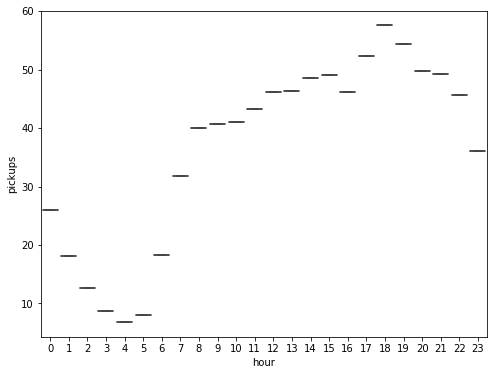

In [0]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns
data = pd.concat([hourwise['hour'], hourwise['pickups']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='hour', y='pickups', data=data, showfliers=False)


In [0]:
data_14 = pd.concat([train_stores['Month'], train_stores['Weekly_Sales'], train_stores['IsHoliday']], axis=1)
plt.figure(figsize=(20,6))
plt.title('Box Plot of Weekly Sales by Month and Holiday')
fig = sns.boxplot(x='Month', y='Weekly_Sales', data=data_14, showfliers=False, hue='IsHoliday')

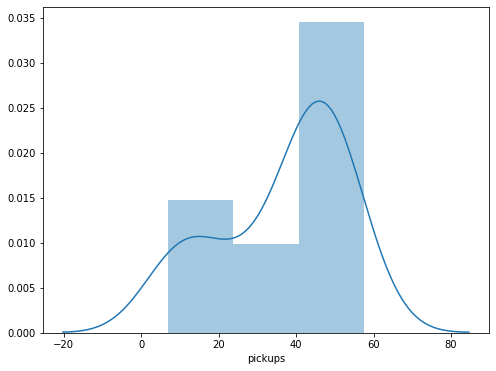

In [0]:
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(hourwise['pickups'])

<p align="justify"> Correlation Matrix:
Correlation is a bi-variate analysis that measures the strength of association between two variables and the direction of the relationship. In terms of the strength of relationship, the value of the correlation coefficient varies between +1 and -1.
A value of ± 1 indicates a perfect degree of association between the two variables. As the correlation coefficient value goes towards 0, the relationship between the two variables will be weaker. The direction of the relationship is indicated by the sign of the coefficient; a + sign indicates a positive relationship and a — sign indicates a negative relationship. Usually, in statistics, we measure four types of correlations: Pearson correlation, Kendall rank correlation, and Spearman correlation. The graph below will give you an idea about correlation.</p>

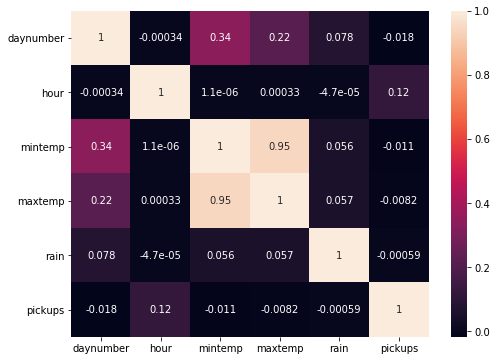

In [25]:
import seaborn as sns

import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(8, 6))
corrMatrix = df_2018.corr()
sns.heatmap(corrMatrix, annot=True)


<p align="justify"> Forecasting pickups using Power BI </p>


<h3> 7. Model Building </h3>
<p align="justify">
 In this phase, I will develop datasets for training and testing purposes. Moreover I will consider whether your existing tools will suffice for running the models or it will need a more robust environment (like fast and parallel processing). I will analyse different models on the data and thereby choose the one with minimum mean square error and higher accuracy.
 </p>

In [0]:
#2018 DATA
query = """
with wd as (
    SELECT 
        cast(year as STRING) as year,
        EXTRACT (DAYOFYEAR FROM CAST(CONCAT(year,'-',mo,'-',da) AS TIMESTAMP)) AS daynumber, 
        MIN(EXTRACT (DAYOFWEEK FROM CAST(CONCAT(year,'-',mo,'-',da) AS TIMESTAMP))) dayofweek,
       MIN(temp) temp,  MIN(min) mintemp, MAX(max) maxtemp, MAX(IF(prcp=99.99,0,prcp)) rain
    FROM `bigquery-public-data.noaa_gsod.gsod2018`
    WHERE stn='725030'   --station id 725030=LaGuardia
    GROUP BY 1,2 
  
  -- TAXI DATA
  ),
TD AS(

SELECT  zone_id, time, pickups ,CAST(EXTRACT (YEAR from time) AS STRING) AS year,EXTRACT (DAYOFYEAR from time) AS daynumber,EXTRACT (HOUR from time) AS hour from `hello.CombinedData` ),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)
SELECT 
td.year,
points.zone_id,
td.time,
td.daynumber,
td.hour,
cast(wd.dayofweek as STRING) as dayofweek, 
wd.temp,  wd.mintemp, 
wd.maxtemp,
wd.rain,
td.pickups,
ST_X(p) as longitude,
ST_Y(p) as latitude
FROM wd, td INNER JOIN points ON points.zone_id=td.zone_id
where wd.year = td.year AND
wd.daynumber = td.daynumber
group by year,zone_id,time,daynumber,hour,pickups,longitude,latitude,dayofweek, temp,mintemp, maxtemp, rain

"""
df1 = client.query(query).to_dataframe()


In [0]:
#2019 DATA
query = """
with wd as (
    SELECT 
        cast(year as STRING) as year,
        EXTRACT (DAYOFYEAR FROM CAST(CONCAT(year,'-',mo,'-',da) AS TIMESTAMP)) AS daynumber, 
        MIN(EXTRACT (DAYOFWEEK FROM CAST(CONCAT(year,'-',mo,'-',da) AS TIMESTAMP))) dayofweek,
        MIN(temp) temp,MIN(min) mintemp, MAX(max) maxtemp, MAX(IF(prcp=99.99,0,prcp)) rain
    FROM `bigquery-public-data.noaa_gsod.gsod2019`
    WHERE stn='725030'   --station id 725030=LaGuardia
    GROUP BY 1,2 
  
  -- TAXI DATA
  ),
TD AS(

SELECT  zone_id, time, pickups ,CAST(EXTRACT (YEAR from time) AS STRING) AS year,EXTRACT (DAYOFYEAR from time) AS daynumber,EXTRACT (HOUR from time) AS hour from `hello.CombinedData` ),points AS
(SELECT *,ST_CENTROID(zone_geom) as p FROM `bigquery-public-data.new_york_taxi_trips.taxi_zone_geom`)
SELECT 
td.year,
points.zone_id,
td.time,
td.daynumber,
td.hour,
cast(wd.dayofweek as STRING) as dayofweek, 
wd.temp,
wd.mintemp, 
wd.maxtemp,
wd.rain,
td.pickups,

    ST_X(p) as longitude,
  ST_Y(p) as latitude
 
  FROM wd, td INNER JOIN points ON points.zone_id=td.zone_id
  where wd.year = td.year AND
  wd.daynumber = td.daynumber
  group by year,zone_id,time,daynumber,hour,pickups,longitude,latitude,dayofweek,temp, mintemp, maxtemp, rain

"""
df2 = client.query(query).to_dataframe()

In [0]:
#2019 DATA
query = """
SELECT  * from `hello.CombinedData`

"""
df2 = client.query(query).to_dataframe()

In [6]:
df1.head()

year zone_id                      time  ...  pickups  longitude   latitude
0  2018       7 2018-01-04 13:00:00+00:00  ...     14.0 -73.919694  40.761493
1  2018       7 2018-01-15 16:00:00+00:00  ...     14.0 -73.919694  40.761493
2  2018       7 2018-01-20 18:00:00+00:00  ...     14.0 -73.919694  40.761493
3  2018       7 2018-01-31 21:00:00+00:00  ...     14.0 -73.919694  40.761493
4  2018       7 2018-02-07 23:00:00+00:00  ...     14.0 -73.919694  40.761493

[5 rows x 13 columns]

In [0]:
df1groupby = df1[['zone_id','time','pickups']].groupby(['zone_id','time','pickups'])

In [16]:

len(df1.zone_id.unique())

259

In [17]:

len(df2.zone_id.unique())

258

In [0]:
data=df2

In [0]:
data["zone_id"] = data["zone_id"].astype(int)
data["dayofweek"] = data["dayofweek"].astype(int)

In [0]:

data.drop('P', axis=1, inplace=True)


In [0]:
import pandas as pd
data.time = pd.to_datetime(data.time,format='%Y-%m-%d')
data.index = data.time
data = data.drop('time', axis=1)
data = data.resample('D').sum() # Resmapling the time series data with month starting first.
# Train-Test splitting of time series data


In [56]:
data.head()

pickups
time                               
2018-01-01 00:00:00+00:00  231546.0
2018-01-02 00:00:00+00:00  233052.0
2018-01-03 00:00:00+00:00  261087.0
2018-01-04 00:00:00+00:00  119818.0
2018-01-05 00:00:00+00:00  259731.0

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


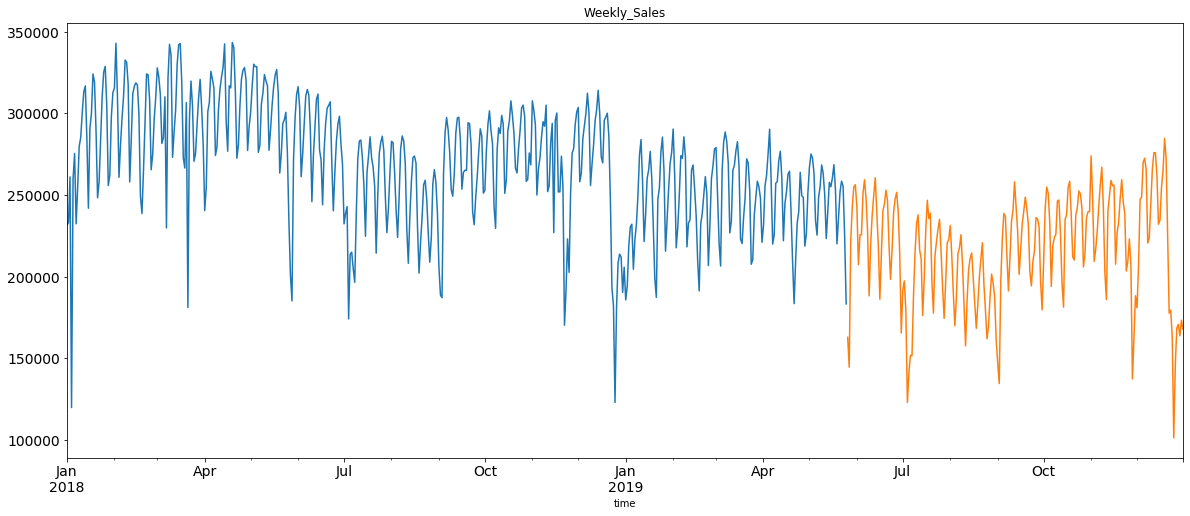

In [57]:
train_data = data[:int(0.7*(len(data)))]
test_data = data[int(0.7*(len(data))):]
# ARIMA takes univariate data.
train_data = train_data['pickups']
test_data = test_data['pickups']
# Plot of Weekly_Sales with respect to years in train and test.
train_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [0]:
data = data.fillna(method='ffill')

In [58]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['pickups'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.8620831215235754
p-value: 0.35010313377312674
Critical Values:
	1%: -3.439593802573824
	5%: -2.865619356068967
	10%: -2.568942332870462


In [33]:
!pip install pyramid-arima

In [53]:
# Applying auto_arima model on train data.
from pyramid.arima import auto_arima
model_auto_arima = auto_arima(train_data, trace=True, error_action='ignore', suppress_warnings=True)
model_auto_arima = auto_arima(train_data, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0, max_p=10, max_q=10, max_P=10, max_Q=10, seasonal=True,stepwise=False, suppress_warnings=True, D=1, max_D=10,error_action='ignore',approximation = False)
model_auto_arima.fit(train_data)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=216120.095, BIC=216164.581, Fit time=10.754 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=223114.395, BIC=223129.224, Fit time=0.415 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=217121.887, BIC=217144.130, Fit time=1.084 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=217173.200, BIC=217195.443, Fit time=2.037 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=216140.457, BIC=216177.529, Fit time=5.204 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=216054.012, BIC=216105.912, Fit time=11.592 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=216169.532, BIC=216214.018, Fit time=4.722 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=213524.367, BIC=213583.682, Fit time=35.523 seconds
Fit ARIMA: order=(4, 1, 4) seasonal_order=(0, 0, 0, 1); AIC=214609.706, BIC=214683.850, Fit time=33.353 secon

KeyboardInterrupt: ignored

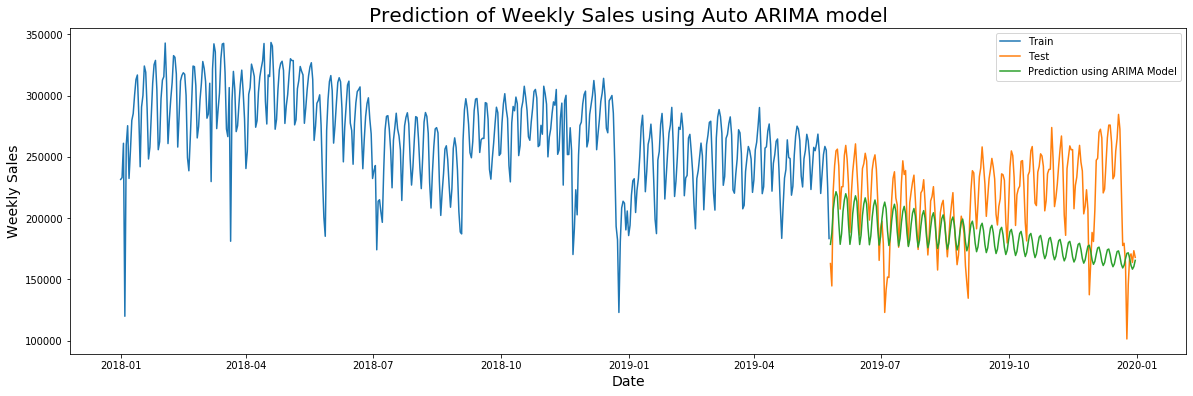

In [46]:
import matplotlib.pyplot as plt
forecast = model_auto_arima.predict(n_periods=len(test_data))
forecast = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Pickups', fontsize=20)
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(forecast, label='Prediction using ARIMA Model')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [0]:
print('Mean Squared Error (MSE) of ARIMA: ', mean_squared_error(test_data, forecast))
print('Root Mean Squared Error (RMSE) of ARIMA: ', math.sqrt(mean_squared_error(test_data, forecast)))
print('Mean Absolute Deviation (MAD) of ARIMA: ', mean_absolute_error(test_data, forecast))

In [0]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


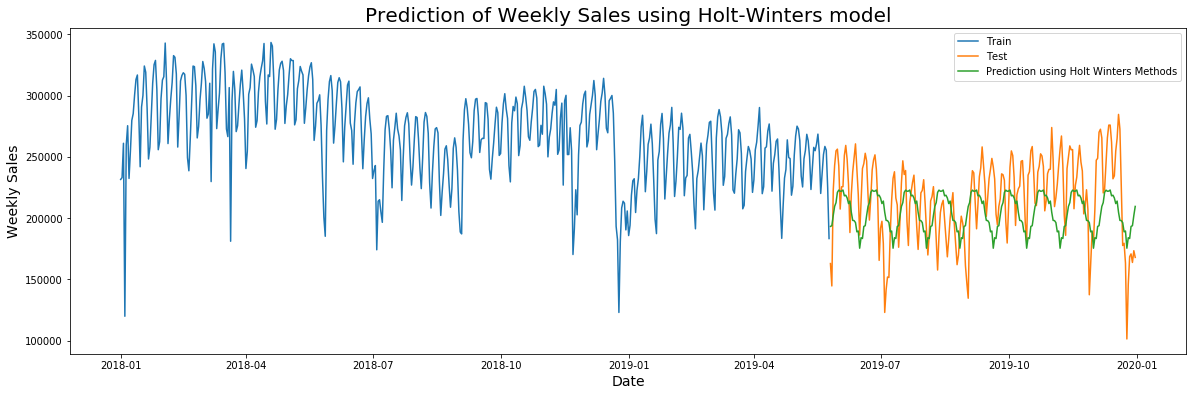

In [68]:
# Fitting the Holt-Winters method for Weekly Sales.
from statsmodels.tsa.api import ExponentialSmoothing
model_holt_winters = ExponentialSmoothing(train_data, seasonal_periods=24, seasonal='additive' ).fit() 
pred = model_holt_winters.forecast(len(test_data))# Predict the test data
#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using Holt-Winters model', fontsize=20)
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred, label='Prediction using Holt Winters Methods')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()


In [69]:
print('Mean Squared Error (MSE) of Holt-Winters: ', mean_squared_error(test_data, pred))
print('Root Mean Squared Error (RMSE) of Holt-Winters: ', math.sqrt(mean_squared_error(test_data, pred)))
print('Mean Absolute Deviation (MAD) of Holt-Winters: ', mean_absolute_error(test_data, pred))

NameError: ignored

Trying

In [0]:
a=df2

In [77]:
a.head()

zone_id                      time  pickups
0       7 2018-01-01 13:00:00+00:00     14.0
1       7 2018-01-04 12:00:00+00:00     14.0
2       7 2018-01-04 13:00:00+00:00     14.0
3       7 2018-01-05 21:00:00+00:00     14.0
4       7 2018-01-06 13:00:00+00:00     14.0

In [0]:
data=df2

In [0]:
data.time = pd.to_datetime(data.time,format='%Y-%m-%d')
data.index = data.time
data = data.drop('time', axis=1)
data = data.resample('D').sum()

In [81]:
data.head()

pickups
time                               
2018-01-01 00:00:00+00:00  231546.0
2018-01-02 00:00:00+00:00  233052.0
2018-01-03 00:00:00+00:00  261087.0
2018-01-04 00:00:00+00:00  119818.0
2018-01-05 00:00:00+00:00  259731.0

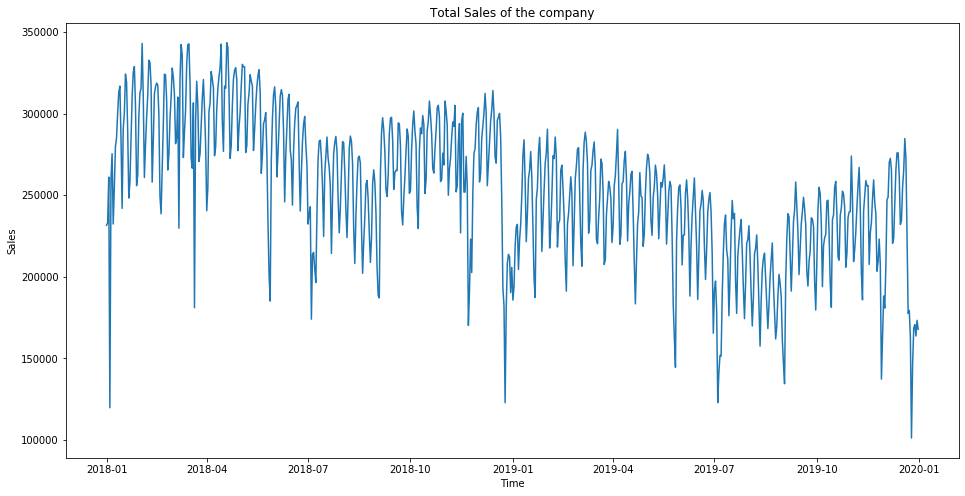

In [82]:
ts=data.groupby(["time"])["pickups"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts);

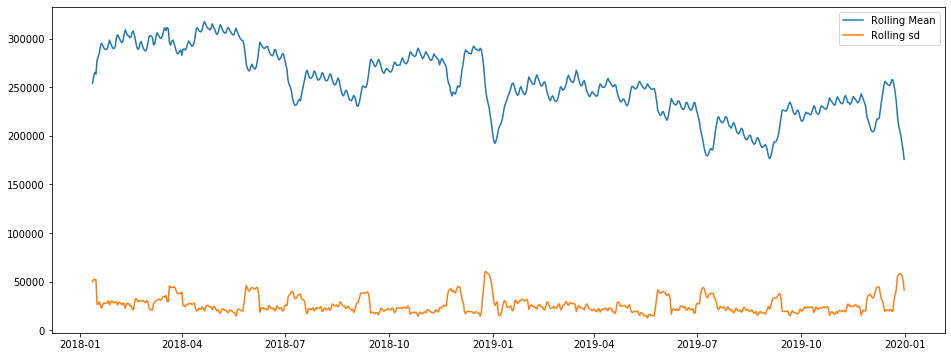

In [83]:
plt.figure(figsize=(16,6))
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend();

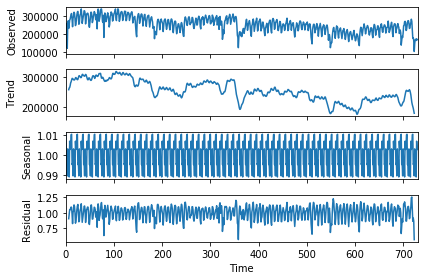

In [84]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="multiplicative")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()

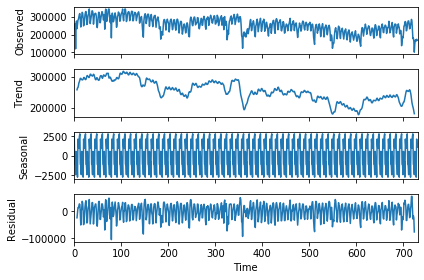

In [85]:
# Additive model
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="additive")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()

In [86]:
# Stationarity tests
def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -1.862083
p-value                          0.350103
#Lags Used                      19.000000
Number of Observations Used    710.000000
Critical Value (1%)             -3.439594
Critical Value (5%)             -2.865619
Critical Value (10%)            -2.568942
dtype: float64


In [0]:
# to remove trend
from pandas import Series as Series
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob

[]

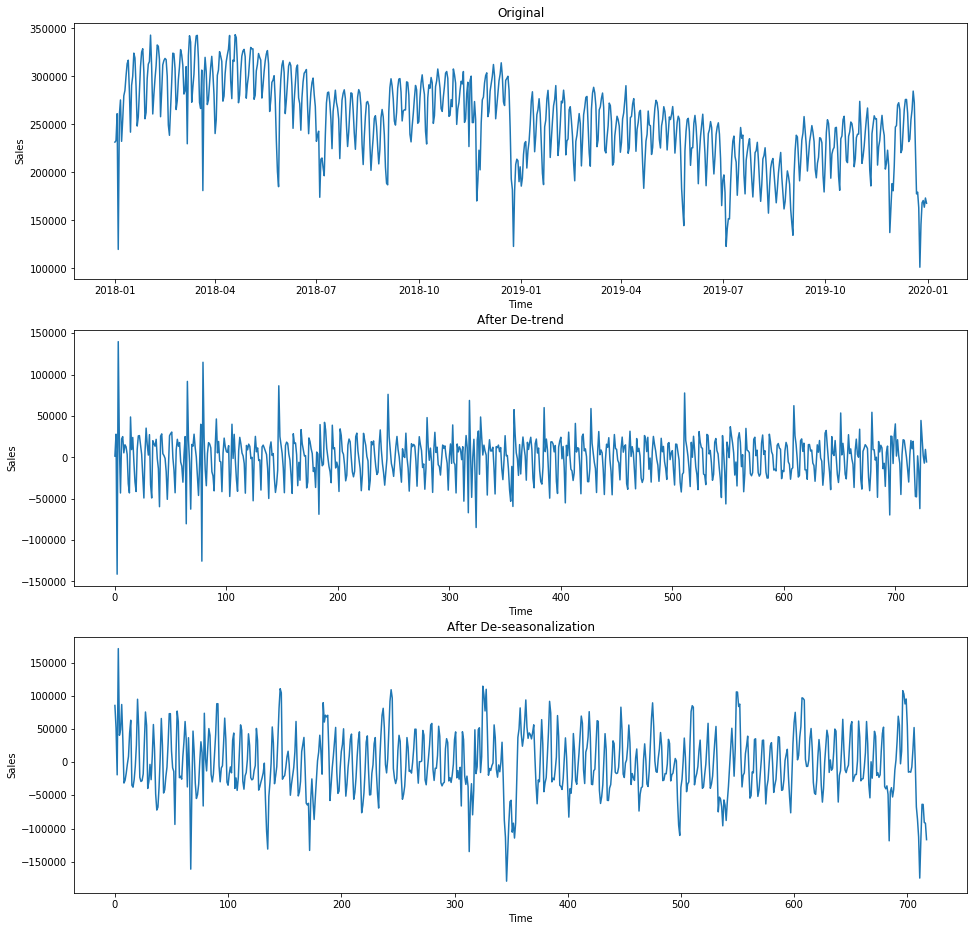

In [88]:
ts=data.groupby(["time"])["pickups"].sum()
ts.astype('float')
plt.figure(figsize=(16,16))
plt.subplot(311)
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)
plt.subplot(312)
plt.title('After De-trend')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts)
plt.plot(new_ts)
plt.plot()

plt.subplot(313)
plt.title('After De-seasonalization')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts,12)       # assuming the seasonality is 12 months long
plt.plot(new_ts)
plt.plot()

In [89]:
test_stationarity(new_ts)

Results of Dickey-Fuller Test:
Test Statistic                -7.981551e+00
p-value                        2.615200e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.970000e+02
Critical Value (1%)           -3.439767e+00
Critical Value (5%)           -2.865696e+00
Critical Value (10%)          -2.568983e+00
dtype: float64


In [0]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh',title=''):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title(title)
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [0]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


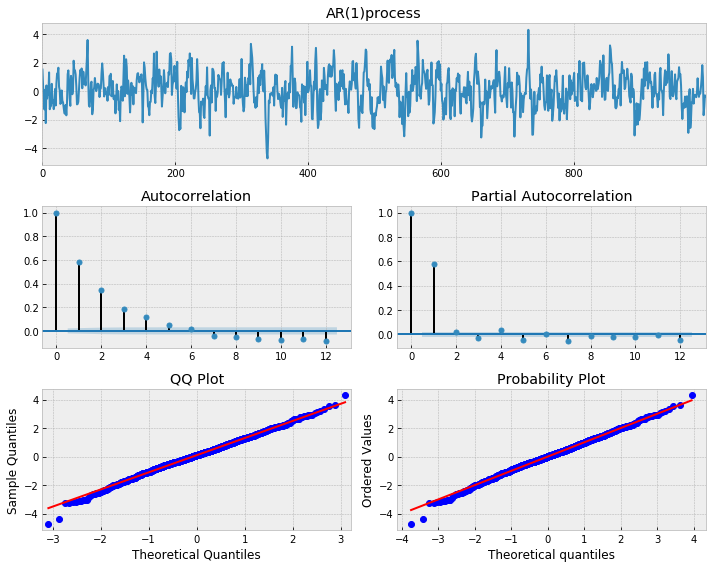

In [96]:
np.random.seed(1)
n_samples = int(1000)
a = 0.6
x = w = np.random.normal(size=n_samples)

for t in range(n_samples):
    x[t] = a*x[t-1] + w[t]
limit=12    
_ = tsplot(x, lags=limit,title="AR(1)process")

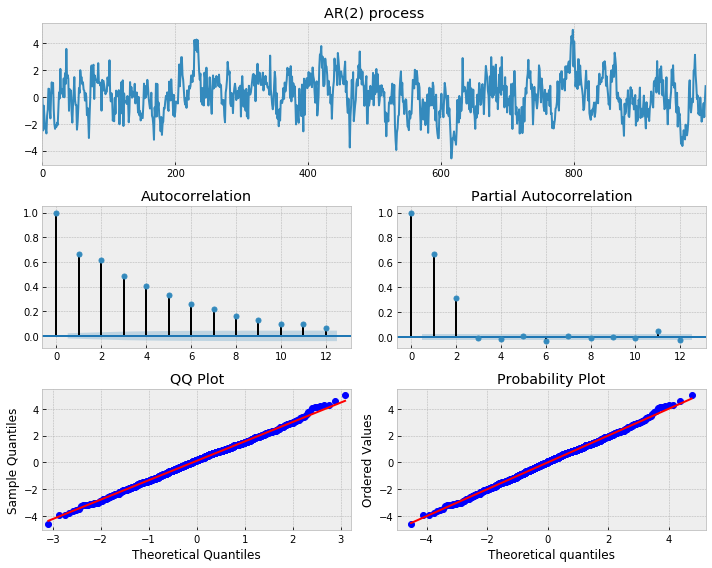

In [97]:
n = int(1000)
alphas = np.array([.444, .333])
betas = np.array([0.])

# Python requires us to specify the zero-lag value which is 1
# Also note that the alphas for the AR model must be negated
# We also set the betas for the MA equal to 0 for an AR(p) model
# For more information see the examples at statsmodels.org
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ar2 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
_ = tsplot(ar2, lags=12,title="AR(2) process")

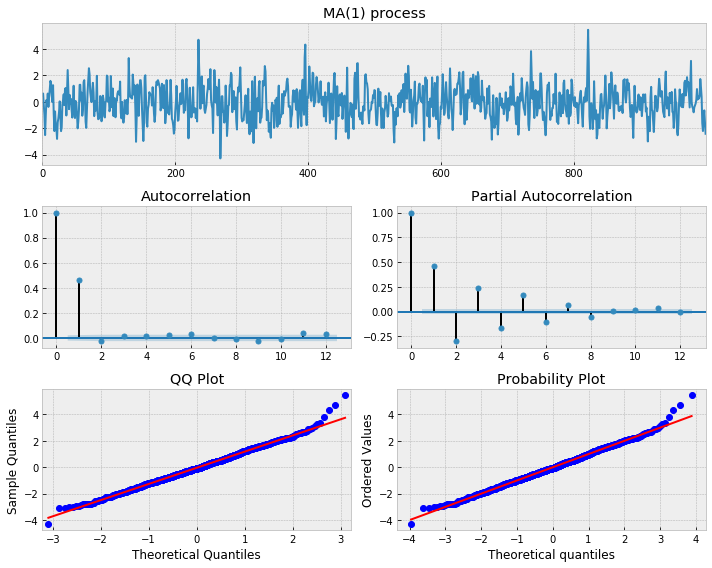

In [98]:
n = int(1000)
# set the AR(p) alphas equal to 0
alphas = np.array([0.])
betas = np.array([0.8])
# add zero-lag and negate alphas
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]
ma1 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
limit=12
_ = tsplot(ma1, lags=limit,title="MA(1) process")

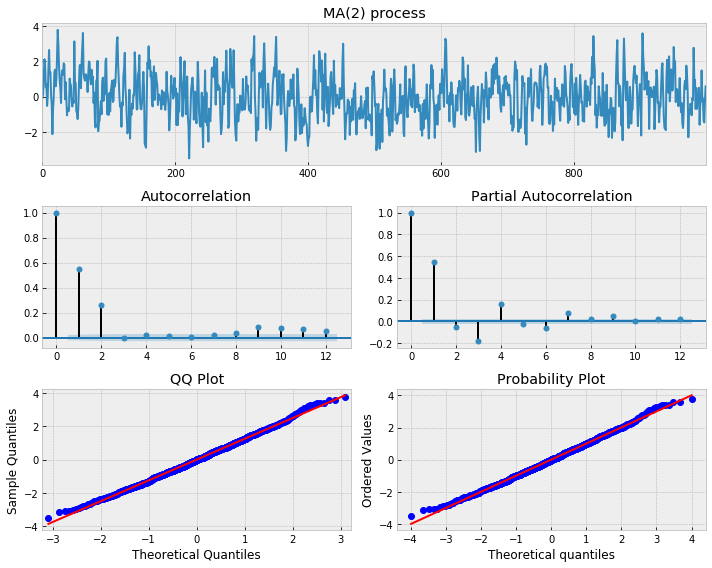

In [99]:
# Simulate MA(2) process with betas 0.6, 0.4
n = int(1000)
alphas = np.array([0.])
betas = np.array([0.6, 0.4])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ma3 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n)
_ = tsplot(ma3, lags=12,title="MA(2) process")

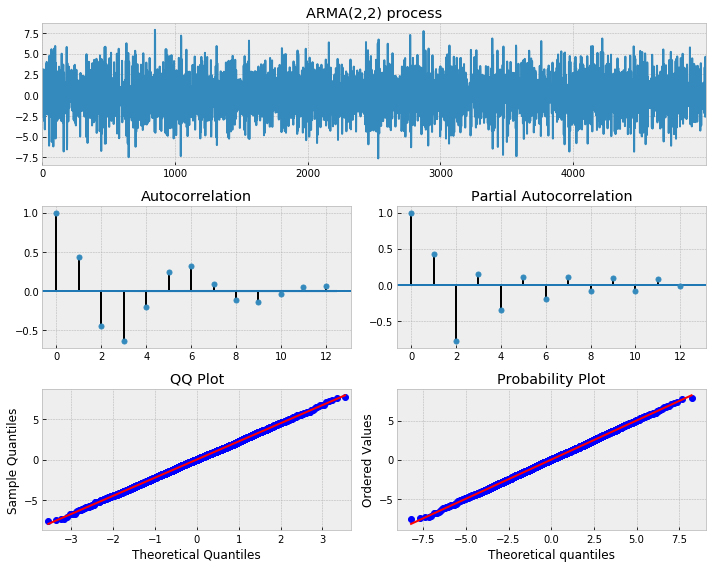

In [100]:
max_lag = 12

n = int(5000) # lots of samples to help estimates
burn = int(n/10) # number of samples to discard before fit

alphas = np.array([0.8, -0.65])
betas = np.array([0.5, -0.7])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

arma22 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=burn)
_ = tsplot(arma22, lags=max_lag,title="ARMA(2,2) process")

In [101]:
best_aic = np.inf 
best_order = None
best_mdl = None

rng = range(5)
for i in rng:
    for j in rng:
        try:
            tmp_mdl = smt.ARMA(arma22, order=(i, j)).fit(method='mle', trend='nc')
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 15326.68109 | order: (2, 2)


In [102]:
best_aic = np.inf 
best_order = None
best_mdl = None

rng = range(5)
for i in rng:
    for j in rng:
        try:
            tmp_mdl = smt.ARMA(new_ts.values, order=(i, j)).fit(method='mle', trend='nc')
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 16754.26676 | order: (4, 4)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [0]:
best_mdl.predict()

In [136]:
data.head()

pickups
time                               
2018-01-01 00:00:00+00:00  231546.0
2018-01-02 00:00:00+00:00  233052.0
2018-01-03 00:00:00+00:00  261087.0
2018-01-04 00:00:00+00:00  119818.0
2018-01-05 00:00:00+00:00  259731.0

In [122]:
ts=data.groupby(["time"])["pickups"].sum()
ts.index=pd.date_range(start = '2018-01-01',end='2019-12-31', freq = 'D')
ts=ts.reset_index()
ts.head()

index   pickups
0 2018-01-01  231546.0
1 2018-01-02  233052.0
2 2018-01-03  261087.0
3 2018-01-04  119818.0
4 2018-01-05  259731.0

In [127]:
from fbprophet import Prophet
#prophet reqiures a pandas df at the below config 
# ( date column named as DS and the value column as Y)
ts.columns=['ds','y']
model = Prophet( yearly_seasonality=True) #instantiate Prophet with only yearly seasonality as our data is monthly 
model.fit(ts) #fit the model with your dataframe

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [130]:
future = model.make_future_dataframe(periods = 365, freq = 'D')  
# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
1090 2020-12-26  141432.467516  115223.302865  169871.350472
1091 2020-12-27  102642.386166   73485.471655  130993.914620
1092 2020-12-28  108557.593977   80082.446757  134555.319535
1093 2020-12-29  128098.345681  103062.948075  153482.441073
1094 2020-12-30  132913.154434  105403.012783  160566.611332

In [126]:
forecast.head()

ds          trend  ...  multiplicative_terms_upper           yhat
0 2018-01-01  296956.718836  ...                         0.0  275728.271292
1 2018-01-02  296873.639446  ...                         0.0  298653.803402
2 2018-01-03  296790.560056  ...                         0.0  306797.315696
3 2018-01-04  296707.480667  ...                         0.0  314974.044670
4 2018-01-05  296624.401277  ...                         0.0  315054.270668

[5 rows x 16 columns]

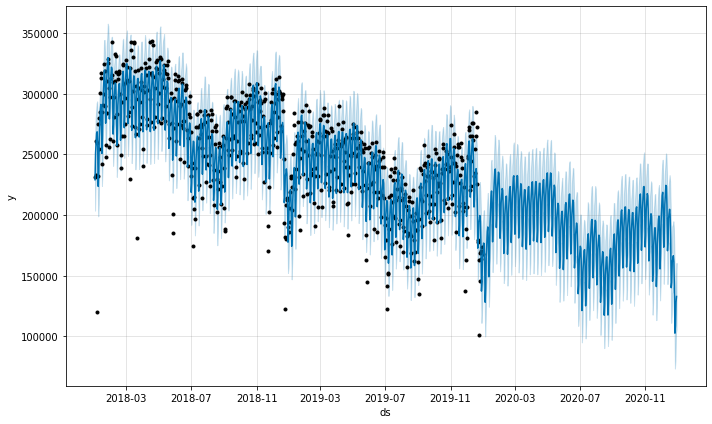

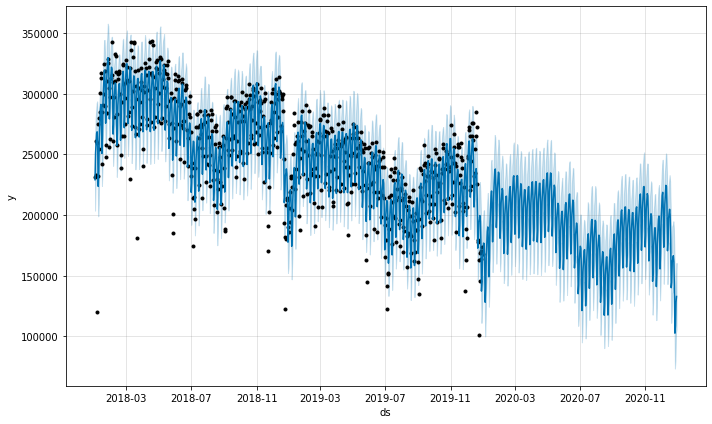

In [131]:
model.plot(forecast)

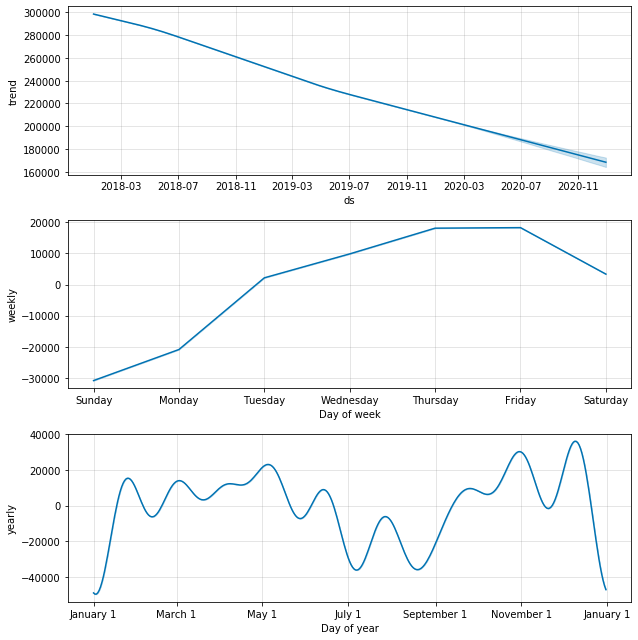

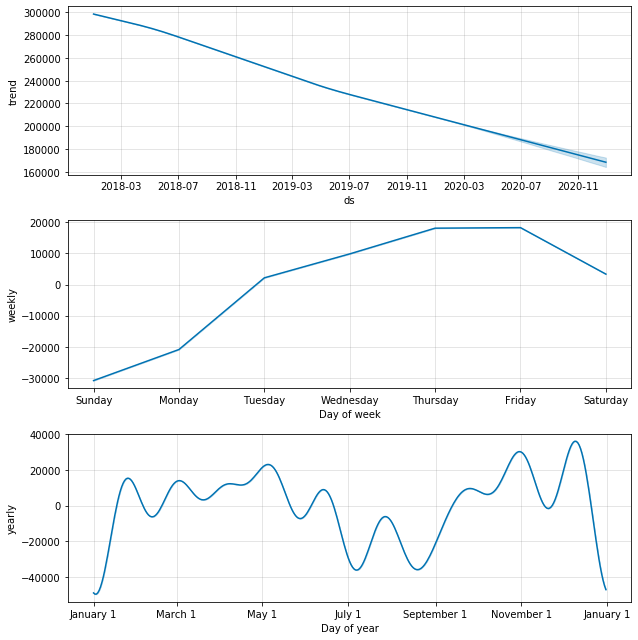

In [133]:
model.plot_components(forecast)

In [137]:
ts=df2.groupby(["time","zone_id"])["pickups"].sum()
# get the shops to the columns
monthly_shop_sales=monthly_shop_sales.unstack(level=1)
monthly_shop_sales=monthly_shop_sales.fillna(0)
monthly_shop_sales.index=dates
monthly_shop_sales=monthly_shop_sales.reset_index()
monthly_shop_sales.head()

ValueError: ignored